In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io
from skimage.transform import resize, rotate
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,  KFold
import warnings
warnings.filterwarnings('ignore')

In [9]:
ls acnh_small

0177myxmpiq41.jpg  95itt33yxdv41.jpg  i3ymm53373j41.jpg  qlpr7h1rprz41.jpg
05tmnohw0qn41.png  95senj68juz41.jpg  i5bcwpwrput41.jpg  qrb8pebthjj41.jpg
06wprmd2m7u41.jpg  9f1ncxkdrtp41.jpg  i6oj6w5grmt41.jpg  qu6ezf8n63o41.png
07nqetuqw9w41.jpg  9f43oniyalr41.jpg  iPq1MWC.jpg        qvlu1yrvfvi41.jpg
07xjd27c8uy41.jpg  9ic44op0xyu41.jpg  icmdhvjbxcs41.jpg  r0a61jwuaul41.jpg
086tektpmp051.jpg  9kfeii1ods051.jpg  idhi876mjlu41.jpg  r6g5hc8mdfw41.jpg
0czcmw8rmsz41.jpg  9md0uw7o5ty41.png  idzk49t876y41.jpg  r7wlkpp05mt41.jpg
0d95wo29cl051.jpg  9mm78thz7jz41.jpg  ieTOCu2.jpg        r9gk9rwhkvr41.jpg
0f348gu5nuk41.jpg  9nkshyrrm0u41.jpg  igk5q7v9yqy41.jpg  raklbu2zaa051.jpg
0gdakfpl6bh41.jpg  9qfgjoud73s41.jpg  igkzapdeyut41.jpg  raosv2hyz6s41.jpg
0htu1r0l35y41.jpg  9s3q7mmyed051.jpg  ij7kzf2x91p41.jpg  rbh7oe3eki151.jpg
0iycgvopjqp41.jpg  9ws1onrchqu41.jpg  imeso89033q41.jpg  rco3861hcuv41.jpg
0jun1e5etxu41.jpg  9y8d7j0n1w151.jpg  inu4ftn88fs41.jpg  rd84fbs31pu41.jpg
0k85pi0eqd151.jpg  9z7t24

In [16]:
acnh_im_list=os.listdir('acnh_small')
doom_im_list=os.listdir('doom_small')

In [11]:
doom=pd.read_csv('archive/doom_crossing_dataset.csv')
acnh=pd.read_csv('archive/animal_crossing_dataset.csv')

In [12]:
index_a=pd.Index(acnh['filename'])
acnh_sub=pd.DataFrame(acnh['subreddit']).set_index(index_a)
index_d=pd.Index(doom['filename'])
doom_sub=pd.DataFrame(doom['subreddit']).set_index(index_d)
y=pd.concat([doom_sub ,acnh_sub])

In [18]:
pic=io.imread('doom_small/'+doom_im_list[69])

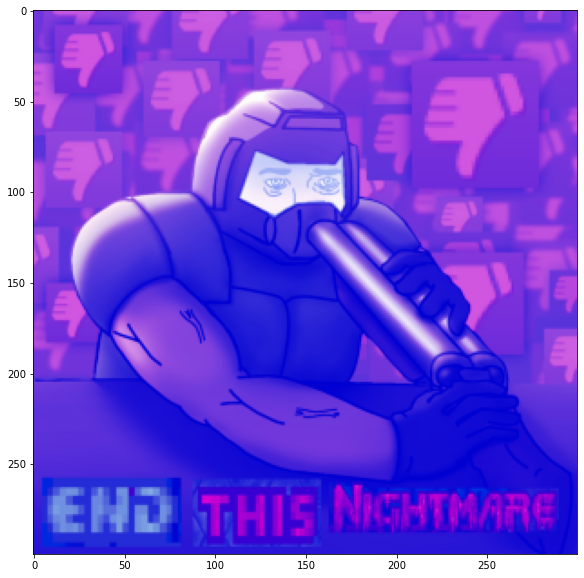

In [19]:
fig, ax=plt.subplots(figsize=(10,10))
ax.imshow(pic)

In [71]:
nrow, ncol, k = (300, 300, 20)
def colors_only(in_folder, out_folder, im_list, nrow, ncol, k):
    colors=np.zeros((len(im_list), k, 3))
    col_counts=np.zeros((len(im_list), k))
    for idx,im in enumerate(im_list):
        pic=io.imread(in_folder + im)
        pixels=[pic[irow][icol] for irow in range(nrow) for icol in range(ncol)]
        pic_cl=KMeans(n_clusters=k).fit(pixels)
        pic_comp=pic_cl.cluster_centers_[pic_cl.labels_]
        reshape=pic_comp.reshape(300, 300, 3)
        png=im.replace('jpg', 'png')
        colors[idx]=(pic_cl.cluster_centers_)
        col_counts[idx]=(np.unique(pic_cl.labels_, return_counts=True)[1])
        io.imsave(out_folder + png, reshape)
    pd.DataFrame(colors, index=im_list).to_csv(out_folder + '_colors')
    pd.DataFrame(col_counts, index=im_list).to_csv(out_folder + '_counts')

In [74]:
colors_only('acnh_small/', 'acnh_color/', acnh_im_list, nrow, ncol, k)

FileNotFoundError: No such file: '/Users/johnwilliams/Heather/Galvanize/capstones/acnh_v_doom/acnh_small/1869awy2j1p41.jpg'

In [75]:
colors_only('doom_small/', 'doom_color/', doom_im_list, nrow, ncol, k)

Lossy conversion from float64 to uint8. Range [20.310517380036835, 252.70831127579925]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [6.068337129840575, 244.3910614525137]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [4.6662900492295805, 244.3348017621148]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2.0367849038584325, 226.24285714285733]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [11.101450810125556, 245.87396249615733]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0893088660620975, 253.74732064741954]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [17.60691823899387, 252.1717999668644].

Lossy conversion from float64 to uint8. Range [1.2193041311220867, 223.43521594684387]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.7493022492198946, 218.5716395864103]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [18.088808284094995, 249.65085248332102]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2.5514587640707305, 247.6137100509503]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.17781927586104018, 251.39232781167624]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [3.0517629829919954, 247.90487238979114]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [10.490927419354342, 226.391408114558

Lossy conversion from float64 to uint8. Range [12.954449152542807, 241.93846153846158]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [3.696664645238755, 252.12055507372122]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [6.387408088236754, 253.64961019676522]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [3.9365016761969684, 252.704419889504]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [6.268044324646304, 249.7505104124126]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [17.346457712731144, 203.4666666666667]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [4.566964285717113, 250.60869565217286]. Co

Lossy conversion from float64 to uint8. Range [2.234937731404301, 231.24078449905244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2.363200166890266, 223.1866825208079]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [13.797019807381233, 243.46335299073297]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [9.033802816900973, 252.19312169312315]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [10.57412292271345, 251.181785457162]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [6.061987799617079, 248.19182156133598]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [4.307172443861191, 254.35589062241945]. Con

Lossy conversion from float64 to uint8. Range [4.566801165657957, 246.93795243019713]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [4.538340170398953, 252.94090554968892]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [4.871501581895956, 254.22948354925654]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [4.653312087410626, 242.5837320574156]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0161304088030931, 253.72456964002305]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [33.784474206350225, 247.51042196237685]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.9188200877636774, 252.4220912352647]. 

Lossy conversion from float64 to uint8. Range [20.784861717613566, 238.42248301420693]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [7.490452930728978, 252.86745871250704]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [9.783268018402609, 244.98336798336803]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [12.92808219178076, 250.27644521139212]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.6264835771459332, 248.61207183239333]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [10.566458519178923, 252.07975155279487]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [11.324665391969923, 224.18384401114156

Lossy conversion from float64 to uint8. Range [6.166102737619937, 234.24254881808912]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [8.502857142858744, 254.33149779737897]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [7.657013856453432, 245.5063373415673]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [3.1619176843063457, 253.42623956798894]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [10.228447139470987, 252.42217671152636]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [6.8538028169009735, 241.85623409669168]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [4.379553148274482, 250.0565577249572]. 

Lossy conversion from float64 to uint8. Range [0.33347657928864294, 251.2028711749153]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [6.395319757055823, 244.84554629223345]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.7742783720791451, 224.4888888888889]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [23.69564528899369, 254.12182945735617]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [3.3337865397682833, 252.9963032435675]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [3.9445392491448388, 253.95018937725533]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [5.870629059520553, 239.332317073172]. C

Lossy conversion from float64 to uint8. Range [6.039571005916997, 252.13543599257815]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [22.52432885906029, 253.42000000000473]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [10.021742009955396, 235.86403508771926]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0811781609199116, 247.20507614213244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [8.577168453915391, 242.18648939992417]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [50.33272561531402, 248.81923293852202]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [9.104933110367682, 253.31627087829122].

Lossy conversion from float64 to uint8. Range [4.9047619047616, 244.3669943401844]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [14.112724757952748, 253.90245206445525]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [17.85039370079187, 254.82423059790722]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [12.162238419938348, 253.58130081300817]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [3.523101647251437, 253.7232186351339]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [5.830167597764671, 254.81452109639434]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [14.416719576718634, 242.24278728606342]. Co

Lossy conversion from float64 to uint8. Range [6.687181497453281, 237.4990476190473]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0983880397567987, 239.85943705750583]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [9.845223090498223, 254.88094736842413]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.9097610006717503, 247.31332655137342]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [24.917717003566906, 252.89751537014888]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [9.165659460470465, 233.6575342465752]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [4.087990487514752, 224.54545454545453]. 

Lossy conversion from float64 to uint8. Range [5.586698337291352, 254.5453422288149]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [20.104669260699836, 249.11005164878816]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [3.1018716241638344, 253.8315668609771]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [35.25088720876147, 254.04136070733296]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [22.12099644128139, 237.9834146341459]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [7.080485405051103, 242.9907192575405]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.836239575434277, 253.2142177841505]. Conv

Lossy conversion from float64 to uint8. Range [9.14531814393031, 247.3807658833759]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.40095135798645387, 247.51335311572706]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [8.164239075841067, 253.09677810812258]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2.852589641434175, 246.22964509394592]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [4.9143775569854995, 244.5487469216286]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [14.696920252905173, 247.33333333333292]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2.680577849119487, 254.17638399257214]. 

Lossy conversion from float64 to uint8. Range [13.996137615335783, 252.33754322657643]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [30.695170936355893, 237.54423592493276]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [11.091128061019418, 246.66815034619162]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [9.545657429795213, 245.48711914788458]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [3.161308116627673, 250.97695852534574]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [5.337997746053539, 232.43836171940742]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [28.0492673358714, 243.31333690412137].

Lossy conversion from float64 to uint8. Range [3.88428615102643, 254.6626423862764]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [18.878304478882015, 216.79188255613104]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [39.528823374572944, 246.84246061515367]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [5.128485704198894, 251.37186865267597]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [8.514587892049505, 231.03221564759997]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [8.4834656084671, 243.76023881847692]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [8.92828282828274, 245.71717171717194]. Conv

Lossy conversion from float64 to uint8. Range [21.3752422480608, 243.7920110192842]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [3.722006841505504, 253.36647479504668]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [22.986717267551583, 245.68096809680966]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [5.556035369113559, 233.91185729275935]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [6.595348837210764, 242.20535714285717]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [22.623425909953816, 221.93591654247479]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [5.89441201001199, 253.47803830911883]. Co

ValueError: Must pass 2-d input

In [34]:
pic=io.imread('acnh_color/acnh_color'+acnh_im_list[10])

In [37]:
pic.reshape(300,300,3)

array([[[130,  94,  86],
        [130,  94,  86],
        [130,  94,  86],
        ...,
        [158, 124, 109],
        [158, 124, 109],
        [158, 124, 109]],

       [[130,  94,  86],
        [130,  94,  86],
        [130,  94,  86],
        ...,
        [158, 124, 109],
        [158, 124, 109],
        [158, 124, 109]],

       [[130,  94,  86],
        [130,  94,  86],
        [130,  94,  86],
        ...,
        [158, 124, 109],
        [158, 124, 109],
        [158, 124, 109]],

       ...,

       [[ 21,  14,  14],
        [ 21,  14,  14],
        [ 21,  14,  14],
        ...,
        [ 21,  14,  14],
        [ 21,  14,  14],
        [ 21,  14,  14]],

       [[ 21,  14,  14],
        [ 21,  14,  14],
        [ 21,  14,  14],
        ...,
        [ 21,  14,  14],
        [ 21,  14,  14],
        [ 21,  14,  14]],

       [[ 21,  14,  14],
        [ 21,  14,  14],
        [ 21,  14,  14],
        ...,
        [ 21,  14,  14],
        [ 21,  14,  14],
        [ 21,  14,  14]]

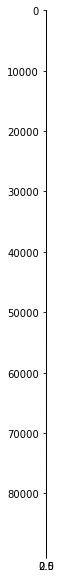

In [38]:
fig, ax=plt.subplots(figsize=(10,10))
ax.imshow(pic)

In [27]:
im_colors=[]
color_counts=[]
for idx,im in enumerate(acnh_im_list):
    int(base * round(float(x)/base))

NameError: name 'col_counts' is not defined

In [47]:
doom_shape=[]
for idx in range(len(doom_im_list)):
    pic=io.imread('archive/doom/'+doom_im_list[idx])
    x,y,z=pic.shape
    doom_shape.append([x,y,z])

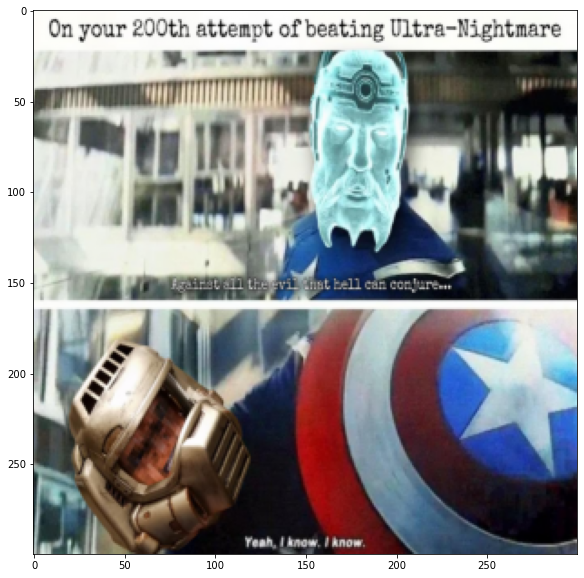

In [89]:
fig, ax=plt.subplots(figsize=(10,10))
pic_sm=resize(pic, (300, 300, 3), anti_aliasing=True)
ax.imshow(pic_sm)
size=np.array((300, 300, 3))
io.imsave('test.jpg', pic)

In [91]:
rm test.jpg

In [49]:
np.array(doom_shape[0])

array([1339, 1071,    3])

In [52]:
np_doom_shape=np.array([np.array(shape) for shape in doom_shape])

In [40]:
min(doom_shape)

(177, 415, 3)

In [57]:
df_doom_shape=pd.DataFrame(np_doom_shape).set_index(index)

In [58]:
df_doom_shape

0     1  2
id                   
gtli3b  1339  1071  3
fnj4e5   475   589  3
gemj1h   639   640  3
fzhpqt  1503  1080  3
g4v23f  2048  1340  4
...      ...   ... ..
dirl12   480   640  4
fvmlvj   524   750  3
96ps5e   347   640  3
d136d2   703   480  3
b92vjw  1080  1346  3

[840 rows x 3 columns]

In [62]:
pos={0:'x', 1:'y', 2:'z'}
df_doom_shape.rename(pos, axis=1, inplace=True)

In [63]:
df_doom_shape.describe()

x            y           z
count   840.000000   840.000000  840.000000
mean   1313.338095  1390.732143    3.160714
std     950.752359   982.542979    0.367486
min     177.000000   230.000000    3.000000
25%     694.750000   750.000000    3.000000
50%    1024.000000  1078.000000    3.000000
75%    1559.500000  1700.000000    3.000000
max    6000.000000  7311.000000    4.000000

In [70]:
df_doom_shape.sort_values(by='y').head(50)

x    y  z
id                  
cw34y7   294  230  3
g6uqpa   370  308  3
frfcty   348  334  4
fe6jzv   388  382  3
b6gdat   604  396  3
bt45oc   416  406  3
fx5lqq   884  408  3
fancp0   177  415  3
gftsqb   720  416  3
fmhxbn   481  420  4
fqnjpi   261  431  3
df0sq9   449  445  3
efzsmj   360  449  3
glmrai   584  457  4
g0dtz3   335  480  4
fxj8hv   480  480  3
d136d2   703  480  3
fzsgxa   600  480  3
fnv9lu   640  480  3
gprxby   361  482  3
fu1y2i   437  490  3
g8l0xx   482  494  3
faxrlt  1000  500  4
fd0i6i   411  500  3
et3vtk   558  500  3
gbp4xp   482  500  4
fn9jyz   500  500  3
cdh8k6   500  500  3
gush8i   532  500  3
g32rxw   500  500  3
ghhgnt   528  500  3
gu4wiy   500  500  3
c19cgg   730  500  4
g034t9   521  500  3
e3ovwe   500  500  4
gl67j5   641  500  4
cljmz3   669  500  4
f3loml   528  500  3
f44z9g   727  502  3
fqyl3h   612  508  3
fi7g2u   768  511  4
ezfqzt   288  512  3
fu8tqk   429  512  4
fml826   640  513  3
godbni   960  516  3
fps35b   389  517  3
fr6skx   441  519  4
fvzbee   436  521  3
g6rml4   786  522  3
ejue0x   375  525  3

In [19]:
doom=pd.read_csv('archive/doom_crossing_dataset.csv')
acnh=pd.read_csv('archive/animal_crossing_dataset.csv')

In [71]:
mkdir acnh_small doom_small

In [72]:
mkdir acnh_med doom_med acnh_rep doom_rep acnh_color doom_color

In [92]:
def resize_im(in_folder, out_folder, im_list, size=(300, 300, 3)):
    for im in im_list:
        pic=io.imread(in_folder + im)
        pic_resize=resize(pic, size, anti_aliasing=True)
        io.imsave(out_folder + im, pic_resize)

In [107]:
ls

EDA-IM-DF.ipynb   acnh_rep/         doom_color/       nlp/
EDA-NLP-DF.ipynb  acnh_small/       doom_med/         web_scrape/
README.md         archive/          doom_rep/
acnh_color/       code_snips.ipynb  doom_small/
acnh_med/         cute/             im_process/


In [ ]:
acnh_color doom_color acnh_lines doom_lines

In [10]:
mkdir acnh_32col doom_32col

In [9]:
from skimage.feature import canny
from skimage.restoration import denoise_bilateral
from skimage.restoration import denoise_tv_chambolle
from sklearn.cluster import KMeans

In [21]:
nrow, ncol, k = (300, 300, 20)
def colors_only(in_folder, out_folder, im_list, nrow, ncol, k):
    colors=np.zeros((len(im_list), k, 3))
    col_counts=np.zeros((len(im_list), k))
    for idx,im in enumerate(im_list):
        pic=io.imread(in_folder + im)
        pixels=[pic[irow][icol] for irow in range(nrow) for icol in range(ncol)]
        pic_cl=KMeans(n_clusters=k).fit(pixels)
        pic_comp=pic_cl.cluster_centers_[pic_cl.labels_].astype(np.uint8)
        reshape=pic_comp.reshape(300, 300, 3)
        png=im.replace('jpg', 'png')
        colors[idx]=(pic_cl.cluster_centers_)
        col_counts[idx]=(np.unique(pic_cl.labels_, return_counts=True)[1])
        io.imsave(out_folder + png, pic_comp)
    pd.DataFrame(colors, index=im_list).to_csv(outfolder + '_colors')
    pd.DataFrame(col_counts, index=im_list).to_csv(outfolder + '_counts')

In [22]:
colors_only('acnh_small/', 'acnh_color', acnh_im_list, nrow, ncol, k)

NameError: name 'KMeans' is not defined

In [ ]:
acnh_col=pd.DataFrame(colors, index=acnh_im_list, columns=np.arange(k))
acnh_col_counts=pd.DataFrame(col_counts, index=acnh_im_list, columns=np.arange(k))
acnh_col.to_csv()
acnh_col_counts.to_csv()

In [52]:
nrow, ncol, k = (300, 300, 3)
#colors=np.zeros((k, 3))
#col_counts=np.zeros((k))
pic=io.imread('acnh_small/' + acnh_im_list[69])
pixels=[pic[irow][icol] for irow in range(nrow) for icol in range(ncol)]
pic_cl=KMeans(n_clusters=k).fit(pixels)
pic_comp=pic_cl.cluster_centers_[pic_cl.labels_]
colors=(pic_cl.cluster_centers_)
col_counts=(np.unique(pic_cl.labels_, return_counts=True)[1])

In [66]:
reshaped=pic_comp.reshape(300, 300, 3)

In [54]:
df_colors=pd.DataFrame(colors, columns=['red', 'blue', 'green'])
df_colors['counts']=col_counts

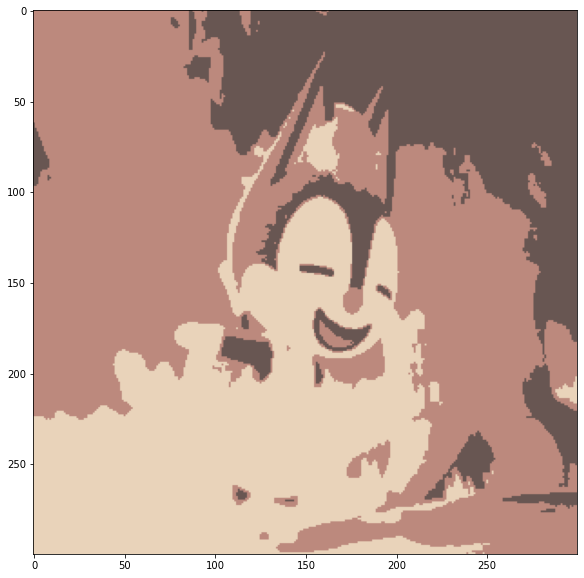

In [67]:
df_fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(reshaped)

In [56]:
png=acnh_im_list[0].replace('jpg', 'png')
io.imsave('acnh_color/' + png, pic_comp)

Lossy conversion from int64 to uint8. Range [82, 233]. Convert image to uint8 prior to saving to suppress this warning.


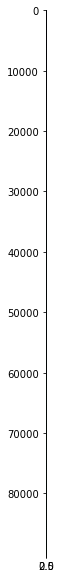

In [57]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(pic_comp)

In [150]:
colors_only('doom_med/', 'doom_color/', doom_im_list, nrow, ncol, k)

Lossy conversion from int64 to uint8. Range [17, 252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [10, 245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [5, 249]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [2, 235]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [11, 245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [1, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [14, 252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [11, 243]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range

Lossy conversion from int64 to uint8. Range [0, 250]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [6, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [6, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [13, 252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [8, 240]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [9, 253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [1, 244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [17, 245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [1

Lossy conversion from int64 to uint8. Range [6, 224]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [5, 247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [1, 253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [4, 249]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [13, 243]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [1, 252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [1, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0,

Lossy conversion from int64 to uint8. Range [3, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [3, 250]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [13, 246]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [11, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [3, 253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 231]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [2, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [7, 233]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [1

Lossy conversion from int64 to uint8. Range [10, 223]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [6, 251]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [10, 249]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [10, 252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [7, 248]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [6, 251]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [

Lossy conversion from int64 to uint8. Range [0, 248]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [23, 236]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [5, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [9, 237]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [3, 251]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [4, 253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [5, 253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [3,

Lossy conversion from int64 to uint8. Range [2, 253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [12, 203]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [8, 246]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [8, 241]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [10, 225]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [13, 249]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [2, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 248]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [

Lossy conversion from int64 to uint8. Range [5, 253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [17, 244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [4, 253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [10, 243]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [4, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [17, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [10, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [2, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range 

Lossy conversion from int64 to uint8. Range [12, 235]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [19, 249]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [4, 217]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [9, 241]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [4, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [9, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [7, 249]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [2, 232]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [1

Lossy conversion from int64 to uint8. Range [16, 245]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [5, 250]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [5, 247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 249]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [1, 247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [6, 253]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [4, 223]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [12, 252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [9

Lossy conversion from int64 to uint8. Range [2, 229]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [38, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [1, 243]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [2, 251]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [1, 240]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [9, 247]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [1, 239]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [11, 251]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [5

Lossy conversion from int64 to uint8. Range [3, 252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [7, 232]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [4, 244]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [10, 249]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [16, 251]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [5, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [3, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [3, 252]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [1

Lossy conversion from int64 to uint8. Range [10, 229]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 250]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [1, 254]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [11, 243]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [4, 251]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 250]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [5, 250]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [9, 243]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0